In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/luminati-io/Amazon-dataset-samples/main/amazon-products.csv"
df = pd.read_csv(url)
print(df.head())


                 timestamp                                              title  \
0  2023-08-08 00:00:00.000              Saucony Men's Kinvara 13 Running Shoe   
1  2023-08-09 00:00:00.000  Kishigo Premium Black Series Heavy Duty Unisex...   
2  2024-02-04 00:00:00.000  TWINSLUXES Solar Post Cap Lights Outdoor - Wat...   
3  2024-06-09 00:00:00.000  Accutire MS-4021B Digital Tire Pressure Gauge ...   
4  2024-01-16 00:00:00.000  SAURA LIFE SCIENCE Adivasi Ayurvedic Neelgiri ...   

             seller_name               brand  \
0           Orv███tor███             Saucony   
1           Ama███.co███             Kishigo   
2           Twi███uxe███          TWINSLUXES   
3  Cit███ran███Dir██████            Accutire   
4     PRA███ EN███PRI███  SAURA LIFE SCIENCE   

                                         description          initial_price  \
0  When it comes to lightweight speed, nothing cr...                    NaN   
1  The Kishigo Premium Black Series Heavy Duty Ve...              

In [8]:
#Step 1: Clean the Price Columns Remove quotes and convert to float
df['initial_price'] = pd.to_numeric(df['initial_price'].astype(str).str.replace('"', ''), errors='coerce')
df['final_price'] = pd.to_numeric(df['final_price'].astype(str).str.replace('"', ''), errors='coerce')


In [9]:
# Step 2: Basic Analysis Number of products
print("Total products:", len(df))

# Average final price
print("Average final price:", df['final_price'].mean())

# Top 5 most reviewed products
top_reviewed = df.sort_values(by='reviews_count', ascending=False).head(5)
print(top_reviewed[['title', 'reviews_count', 'final_price']])


Total products: 1000
Average final price: 65.02689759036146
                                                 title  reviews_count  \
176  Seagate Expansion 18TB External Hard Drive HDD...         243907   
337  Outward Hound Fun Feeder Slo Bowl, Slow Feeder...         121619   
44   Seresto Large Dog Vet-Recommended Flea & Tick ...         101767   
943  Wobble Wag Giggle Ball 2 Pack- Interactive Dog...          94871   
159          Vans Unisex Old Skool Classic Skate Shoes          79644   

     final_price  
176       332.99  
337         9.11  
44        103.00  
943        24.99  
159        70.00  


In [10]:
#✅ Step 3: Filtering  Products with rating above 4.5 and price below $50
filtered = df[(df['rating'] > 4.5) & (df['final_price'] < 50)]
print(filtered[['title', 'rating', 'final_price']])


                                                 title  rating  final_price
1    Kishigo Premium Black Series Heavy Duty Unisex...     4.6        28.50
6    Bio-Oil Skincare Body Oil (Natural) Serum for ...     4.6        24.95
7    crysting 13 Inch Sewing Box Three Layers, Plas...     4.6        20.99
12   LOOGU Desert Netting Scarf Tactical Miliary Ca...     4.6        11.19
13   PULOTE 100PCS Pink Plastic Plates - Heavy Duty...     4.7        44.99
..                                                 ...     ...          ...
981  Zippers Colorful Resin 14pcs Zippers with Ring...     4.6        15.98
989  Fintie Hybrid Slim Case for iPad 10th Generati...     4.6        13.99
991  Zak Designs Water Bottle for Travel and At Hom...     4.7        17.32
997  Elmer's E842L Carpenter's Interior Wood Filler...     4.6        13.98
999  Bavilk Kids Bike Helmet,Boys Girls Helmet Mult...     4.7        16.49

[270 rows x 3 columns]


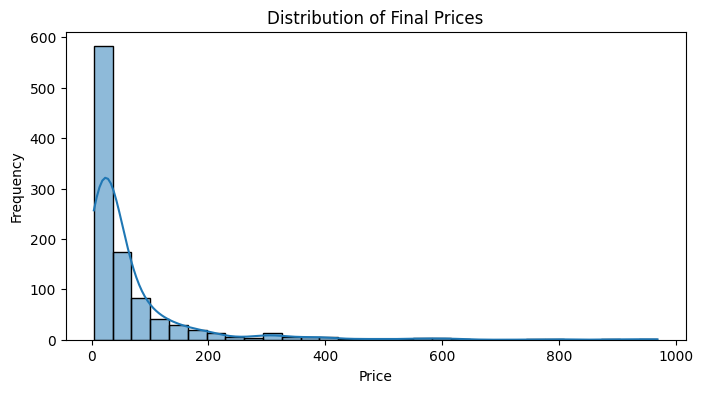

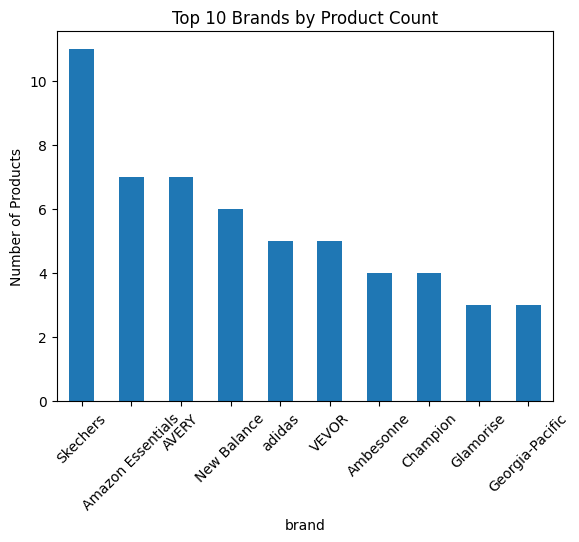

In [11]:
 #Step 4: Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of final prices
plt.figure(figsize=(8, 4))
sns.histplot(df['final_price'].dropna(), bins=30, kde=True)
plt.title("Distribution of Final Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Top brands by number of products
top_brands = df['brand'].value_counts().head(10)
top_brands.plot(kind='bar', title='Top 10 Brands by Product Count')
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()


In [14]:
#Find the product with the highest rating.
print(df[df['rating']==df['rating'].max()])


                   timestamp  \
4    2024-01-16 00:00:00.000   
263  2022-10-02 00:00:00.000   
335  2023-09-11 00:00:00.000   
416  2022-09-18 00:00:00.000   
500  2024-05-13 00:00:00.000   
504  2024-05-13 00:00:00.000   
743  2023-10-04 00:00:00.000   
812  2023-09-10 00:00:00.000   
905  2024-01-16 00:00:00.000   
978  2022-10-23 00:00:00.000   

                                                 title  \
4    SAURA LIFE SCIENCE Adivasi Ayurvedic Neelgiri ...   
263  GBC Paper Shredder, Commercial TAA Compliant, ...   
335                              DEWALT N167287 Handle   
416  Carpets for Kids Cruisin' Around the Town Carp...   
500  CROSSSELL Ergonomic Bike Grips, Handlebar Grip...   
504  YORWHIN Hanging Punching Bag for Adults, 4FT P...   
743  Kirby 204811 Filter Bag Six Pack Micron Magic ...   
812  HEWYIOS Mobile Phone Holder for MagSafe Charge...   
905  Kodiak Furniture Monterey Futon with Linen Fab...   
978  Puroflo Tankless RO System Under sink 600GPD H...   

        

In [15]:
#Count how many products are from each currency.
# Count products by currency
currency_counts = df['currency'].value_counts()
print(currency_counts)


currency
USD    967
INR     31
GBP      2
Name: count, dtype: int64


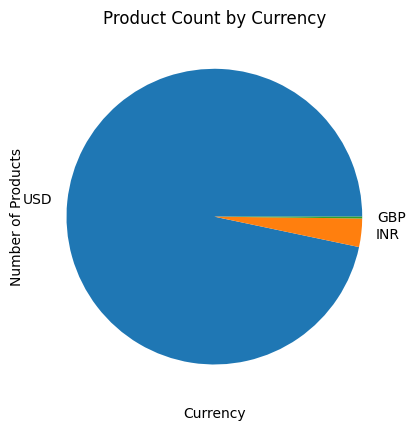

In [18]:
import matplotlib.pyplot as plt

currency_counts.plot(kind='pie' )
plt.title('Product Count by Currency')
plt.xlabel('Currency')
plt.ylabel('Number of Products')
plt.xticks(rotation=30)
plt.show()


In [19]:
seller_name_counts = df['seller_name'].value_counts().head(10)
print(seller_name_counts)

seller_name
Ama███.co███                224
RK ███ld ███oco█████████      9
Orv███tor███                  5
JME███ds                      4
Pin███m                       4
Pel███Sho███                  3
Ama███ Gl███l S█████████      2
SUN███RTS███C                 2
Our███d O███oor███            2
wooki                         2
Name: count, dtype: int64


<Axes: ylabel='count'>

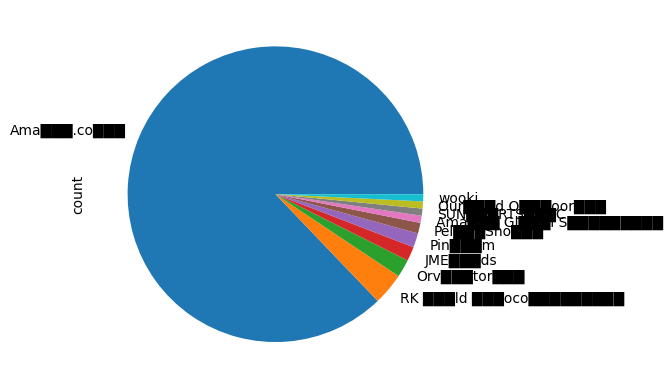

In [20]:
import matplotlib.pyplot as plt
seller_name_counts.plot(kind='pie')